In [122]:
import numpy as np 
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
img=cv2.imread("/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/test_images/sharapova1.jpg")
img.shape

(555, 700, 3)

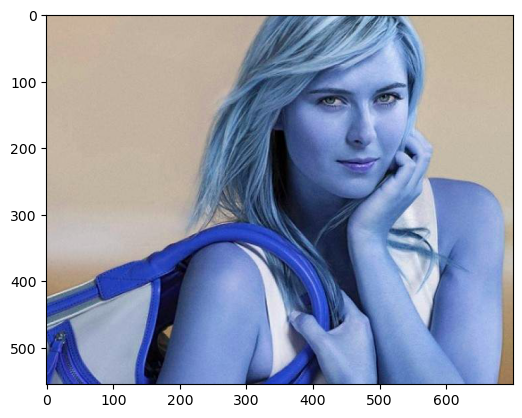

In [3]:
plt.imshow(img);

In [4]:
face_cascade=cv2.CascadeClassifier("/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml")

In [5]:
eye_cascade=cv2.CascadeClassifier("/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/opencv/haarcascades/haarcascade_eye.xml")

In [6]:
faces=face_cascade.detectMultiScale(img,1.3,5)

In [7]:
faces #cor-ordinates of the face(x,y,height,width)

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]

In [9]:
x,y,w,h

(352, 38, 233, 233)

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

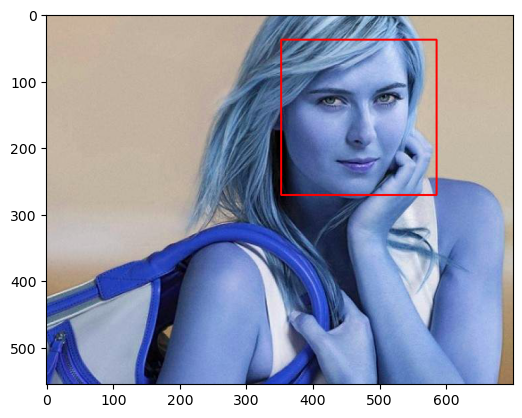

In [12]:
plt.imshow(face_img);

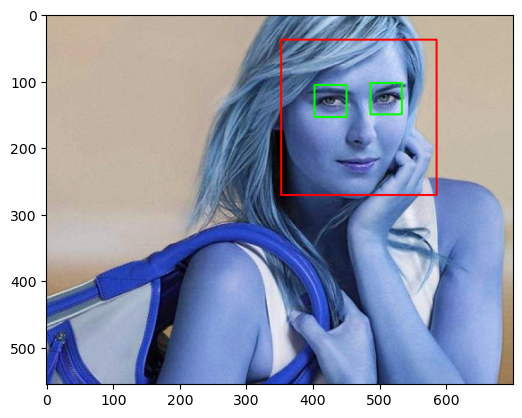

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

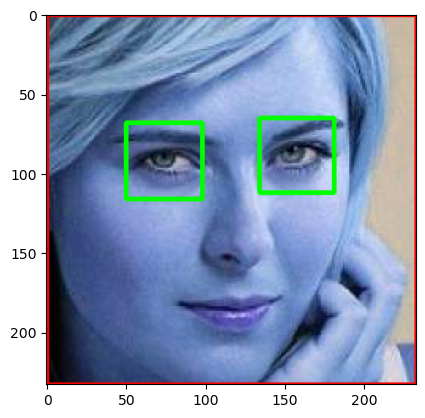

In [14]:
plt.imshow(roi_color,cmap="gray");

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color

In [16]:
cropped_img=get_cropped_image_if_2_eyes("/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/test_images/sharapova1.jpg")

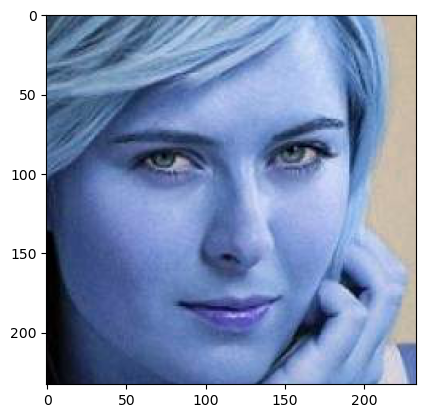

In [17]:
plt.imshow(cropped_img);

In [18]:
no_eyes=get_cropped_image_if_2_eyes("/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/test_images/sharapova12.JPG")

[ WARN:0@32.296] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/test_images/sharapova12.JPG'): can't open/read file: check file path/integrity


In [19]:
no_eyes

In [20]:
path_to_data="/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset"
path_to_cr_data="/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/"

In [21]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/maria_sharapova',
 '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/virat_kohli',
 '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/lionel_messi',
 '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped',
 '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/serena_williams',
 '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/roger_federer']

In [23]:
import shutil

In [24]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_img_dirs=[]
sports_file_names={}
for img_dir in img_dirs:
    count=1
    sports_name=img_dir.split("/")[-1]
    sports_file_names[sports_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + sports_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Rendering Cropped Images are in folder : ",cropped_folder)
    
            cropped_file_name=sports_name +str(count) + ".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path , roi_color)
            sports_file_names[sports_name].append(cropped_file_path)
            count+=1

Rendering Cropped Images are in folder :  /Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova
Rendering Cropped Images are in folder :  /Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/virat_kohli
Rendering Cropped Images are in folder :  /Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/lionel_messi
Rendering Cropped Images are in folder :  /Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/serena_williams
Rendering Cropped Images are in folder :  /Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/roger_federer


In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

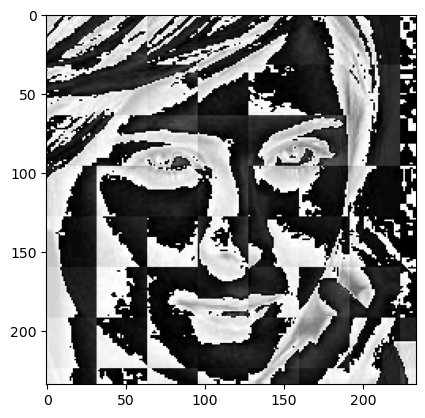

In [30]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray');

In [31]:
sports_file_names

{'maria_sharapova': ['/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova1.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova2.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova3.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova4.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova5.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova6.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova7.png',
  '/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharap

In [114]:
class_dict={}
count=0
for sports_name in sports_file_names.keys():
    class_dict[sports_name]=count
    count=count+1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [118]:
sports_file_names.keys()

dict_keys(['maria_sharapova', 'virat_kohli', 'lionel_messi', 'serena_williams', 'roger_federer'])

In [116]:
sports_file_names.pop('cropped', None)

In [123]:
X=[]
y=[]
for sports_name , training_files in sports_file_names.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scaled_raw_images=cv2.resize(img,(32,32))
        img_har=w2d(img,"db1",5)
        scaled_har_images=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_images.reshape(32*32*3,1),scaled_har_images.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[sports_name])
        
        

[ WARN:0@1687.305] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova11.png'): can't open/read file: check file path/integrity
[ WARN:0@1687.373] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/sarthak/Desktop/Projects/sports_personality_classifier/model/dataset/cropped/maria_sharapova/maria_sharapova27.png'): can't open/read file: check file path/integrity
[ WARN:0@1687.382] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/sarthak/Desktop/Projects/sports_personality_classifie

In [124]:
len(X[0])

4096

In [125]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [126]:
X[0]

array([[173],
       [174],
       [174],
       ...,
       [253],
       [254],
       [252]], dtype=uint8)

In [127]:
X = np.array(X).reshape(len(X),4096).astype(float)

In [128]:
X.shape

(163, 4096)

In [129]:
X[0]

array([173., 174., 174., ..., 253., 254., 252.])

In [130]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [131]:
scale= StandardScaler()

In [132]:
scaled_X= scale.fit_transform(X)

In [133]:
scaled_X

array([[ 1.12518012,  1.11808845,  1.04422724, ...,  1.21731103,
         1.29555805,  1.30389967],
       [-0.53794535, -0.60396454, -0.66268421, ...,  1.21731103,
         1.17736255, -0.91703282],
       [ 0.24244429,  0.65799795,  1.07028695, ...,  1.01422809,
        -0.83196097,  1.19949686],
       ...,
       [-0.89615699, -0.97203693, -1.05357996, ..., -0.46537614,
        -1.05850235, -0.91703282],
       [-0.88336371, -0.86687339, -0.75389321, ...,  1.23665226,
        -1.20624673, -1.08787378],
       [-0.24370007, -0.57767365, -0.74086336, ...,  1.23665226,
        -1.20624673,  1.33237316]])

In [134]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=0)

In [135]:
model=SVC(kernel = 'rbf', C = 10)

In [136]:
model

SVC(C=10)

In [137]:
model.fit(X_train,y_train)

SVC(C=10)

In [138]:
model.predict(X_test)

array([4, 4, 1, 0, 2, 1, 3, 1, 0, 2, 3, 2, 1, 2, 1, 3, 1, 4, 2, 4, 1, 4,
       1, 1, 4, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 3, 0, 1, 3, 0, 1])

In [139]:
model.score(X_test,y_test)*100

92.6829268292683

In [140]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.87      1.00      0.93        13
           2       0.89      1.00      0.94         8
           3       1.00      0.71      0.83         7
           4       1.00      0.86      0.92         7

    accuracy                           0.93        41
   macro avg       0.95      0.91      0.93        41
weighted avg       0.94      0.93      0.92        41



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  2,  0,  5,  0],
       [ 0,  0,  1,  0,  6]])

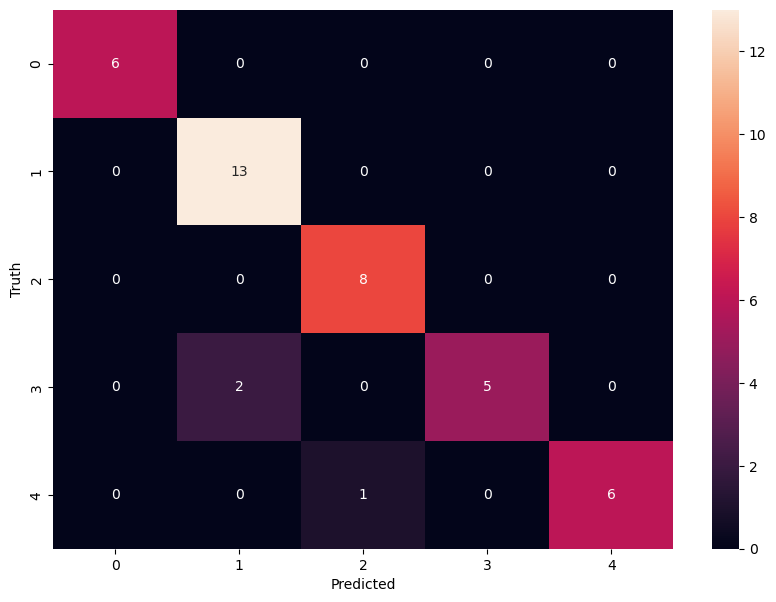

In [143]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [144]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [145]:
import joblib

In [146]:
joblib.dump(model,"final_model.pkl")

['final_model.pkl']

In [147]:
import json
with open("class_dictonary.json","w") as f:
    f.write(json.dumps(class_dict))